In [1]:
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [2]:
import numpy as np
import glob
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.io import read_image

In [4]:
import pandas as pd

In [5]:
df = pd.read_table("/content/drive/MyDrive/expression/train_master.tsv")

In [6]:
def select_eyes(df, eyes):
  df_e = df[df["eyes"] == eyes]
  return df_e

df_open = select_eyes(df, "open")
len(df_open)

152

In [7]:
def select_pose(df, pose):
  df_p = df[df["pose"] == pose]
  return df_p

df_pose = select_pose(df, "straight")
len(df_pose)

77

In [8]:
def make_data_list(df_open):
    df_label = df_open
    list_eyes = df_label["eyes"].tolist()
    list_filepath = df_label["id"].tolist()
    list_expression = df_label["expression"].tolist()
    list_pose = df_label["pose"].tolist()
    list_userid =df_label["userid"].tolist()
    return list_filepath, list_userid,list_pose, list_expression, list_eyes

list_filepath, list_userid, list_pose, list_expression, list_eyes = make_data_list(df_open)

for list_i in list_filepath, list_userid, list_pose, list_expression, list_eyes:
  print(list_i[0])


train_0000.jpg
choon
straight
angry
open


In [9]:
from PIL import Image

In [10]:
import os.path as osp

In [11]:
import cv2

In [12]:
#face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/expression/haarcascade_frontalface_default.xml')

In [13]:
"""
for i in list_filepath:
 img_dir = ("/content/drive/MyDrive/expression/train")
 img_path = osp.join(img_dir, i)
 image = cv2.imread(img_path)
 faces = face_cascade.detectMultiScale(image, 1.3, 5)
 
for(x, y, w, h) in faces:
    trim = image[y:y+h,  x:x+w]
trimed = cv2.imwrite(f'/content/drive/MyDrive/expression/trim_face/{i}', trim)  
image_gray = cv2.cvtColor(trim, cv2.COLOR_BGR2GRAY)
print(image_gray.shape)
cv2.imwrite(f"/content/drive/MyDrive/expression/gray_trim/{i}", image_gray)
"""

'\nfor i in list_filepath:\n img_dir = ("/content/drive/MyDrive/expression/train")\n img_path = osp.join(img_dir, i)\n image = cv2.imread(img_path)\n faces = face_cascade.detectMultiScale(image, 1.3, 5)\n \nfor(x, y, w, h) in faces:\n    trim = image[y:y+h,  x:x+w]\ntrimed = cv2.imwrite(f\'/content/drive/MyDrive/expression/trim_face/{i}\', trim)  \nimage_gray = cv2.cvtColor(trim, cv2.COLOR_BGR2GRAY)\nprint(image_gray.shape)\ncv2.imwrite(f"/content/drive/MyDrive/expression/gray_trim/{i}", image_gray)\n'

In [14]:
def ano(list_expression):
  l_eyes = []
  
  for i in list_expression:
    
    if i == "angry":
      i = 0
      l_eyes.append(i)
    elif i == "sad":
      i = 1
      l_eyes.append(i)
    elif i == "neutral":
      i = 2
      l_eyes.append(i)
    else:
      i = 3
      l_eyes.append(i)
  return l_eyes


anolist = ano(list_expression)
anolist[0]

0

In [15]:
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomRotation(10)
])

transform_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])

In [16]:
class Mydatasets(torch.utils.data.Dataset):
    def __init__(self, list_filepath, anolist, transform):
        self.transform = transform
        self.data = list_filepath
        self.label = anolist

        #self.datanum = len(y)

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        rootpath = "/content/drive/MyDrive/expression/train/"
        img_path = osp.join(rootpath, self.data[idx])
        img = Image.open(img_path)
        img_transformed = self.transform(img)

        out_label = self.label[idx]

        #if self.transform:
        #    out_data = self.transform(out_data)

        return img_transformed, out_label

In [17]:
datasets_try = Mydatasets(list_filepath, anolist, transform_train)

print("Length of dataset: ",datasets_try.__len__())
print("Image shape: ", datasets_try.__getitem__(0)[0].shape) #画像がでてくる
print("Label: ", datasets_try.__getitem__(0)[1]) #ラベルがでてくる

#img_transformed = datasets_try.__getitem__(0)[0]
#img_transformed = img_transformed.numpy().transpose((1,2,0))
#img_transformed = np.clip(img_transformed, 0, 1)
#plt.show(np.array(img_transformed))
#print(np.array(np.array(img_transformed)))

Length of dataset:  152
Image shape:  torch.Size([1, 120, 128])
Label:  0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
print(len(list_filepath))
print(len(anolist))

152
152


In [20]:
train_list_filepath, val_list_filepath, train_list_ann, val_list_ann = train_test_split(
    list_filepath,
    anolist,
    test_size = 0.25
    )

In [21]:
train_datasets = Mydatasets(train_list_filepath, train_list_ann, transform_train)
val_datasets = Mydatasets(val_list_filepath, val_list_ann, transform_val)

print("Train datasets")
print("Length of dataset: ",train_datasets.__len__())
print("Image shape: ", train_datasets.__getitem__(0)[0].shape) #画像がでてくる
print("Label: ", train_datasets.__getitem__(0)[1]) #ラベルがでてくる
print("********************************************************************")
print("Validation datasets")
print("Length of dataset: ",val_datasets.__len__())
print("Image shape: ", val_datasets.__getitem__(0)[0].shape) #画像がでてくる
print("Label: ", val_datasets.__getitem__(0)[1]) #ラベルがでてくる

Train datasets
Length of dataset:  114
Image shape:  torch.Size([1, 120, 128])
Label:  3
********************************************************************
Validation datasets
Length of dataset:  38
Image shape:  torch.Size([1, 120, 128])
Label:  1


In [22]:
batch_size = 10

train_dataloader = DataLoader(train_datasets, batch_size, shuffle=True)
val_dataloader = DataLoader(val_datasets, batch_size, shuffle=False)

for imgs, labels in train_dataloader:
  break

print(imgs.shape)
print(labels)

torch.Size([10, 1, 120, 128])
tensor([1, 3, 1, 3, 0, 2, 2, 2, 2, 2])


In [23]:
# 1. ネットワークを定義する
# 2. 学習条件を設定する
# 3. 学習させてみる

In [24]:
n_output = 4
#midle = 1000
n_hidden = 1000

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [26]:
def eval_loss(train_loader, device, net, criterion):
  
    # データローダーから最初の1セットを取得する
    for image_transformed, labels in train_dataloader:
        break

    
    n_inputs = image_transformed.to(device)
    labels = labels.to(device)

    # 予測計算
    n_outputs = net(n_inputs)

    #  損失計算
    loss = criterion(n_outputs, labels)

    return loss

In [27]:

inputs = torch.randn(152, 1, 120, 128)
conv1 = nn.Conv2d(1, 8, 3)
conv2 = nn.Conv2d(8, 8, 3)
"""
      conv3 = nn.Conv2d(6, 12, 3)
      conv4 = nn.Conv2d(12, 12, 3)
"""
relu = nn.ReLU(inplace=True)
maxpool = nn.MaxPool2d((2,2))
x1 = conv1(inputs)
x2 = relu(x1)
x3 = conv2(x2)
x4 = relu(x3)
x5 = maxpool(x4)
"""
x6 = conv3(x5)
x7 = conv4(x6)
x8 = maxpool(x7)
"""
print(x5.shape)

torch.Size([152, 8, 58, 62])


In [28]:
class CNN(nn.Module):
  def __init__(self, n_output, n_hidden):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 8, 3)
    self.conv2 = nn.Conv2d(8, 8, 3)
    #self.conv3 = nn.Conv2d(6, 12, 3)
    #self.conv4 = nn.Conv2d(12, 12, 3)
    self.relu = nn.ReLU(inplace=True)
    self.maxpool = nn.MaxPool2d((2,2))
    self.flatten = nn.Flatten()
    self.l1 = nn.Linear(28768, n_hidden)
    self.l2 = nn.Linear(n_hidden, n_output)
    #self.l3 = nn.Linear(midle, n_output)

    self.features = nn.Sequential(
        self.conv1,
        self.relu,
        self.conv2,
        self.relu,
        self.maxpool
        #self.conv3,
        #self.relu,
        #self.conv4,
        #self.relu,
        #self.maxpool,
        )
    
    self.classifier = nn.Sequential(
       self.l1,
       self.relu,
       self.l2
       #self.relu,
       #self.l3
       )

  def forward(self, x):
    x1 = self.features(x)
    x2 = self.flatten(x1)
    x3 = self.classifier(x2)
    return x3       

In [29]:
lr = 0.001
net = CNN(n_output, n_hidden).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
history = np.zeros((0, 5))

In [30]:
# 学習用関数
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, devise, history):

    # tqdmライブラリのインポート
    from tqdm.notebook import tqdm

    base_epochs = len(history)
  
    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        #訓練フェーズ
        net.train()
        count = 0

        for inputs, labels in tqdm(train_dataloader):
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)
           

            # 勾配の初期化
            optimizer.zero_grad()

            # 予測計算
            outputs = net(inputs)

            # 損失計算
            loss = criterion(outputs, labels)
            train_loss += loss.item()

            # 勾配計算
            loss.backward()

            # パラメータ修正
            optimizer.step()

            # 予測値算出
            predicted = torch.max(outputs, 1)[1]

            # 正解件数算出
            train_acc += (predicted == labels).sum().item()

            # 損失と精度の計算
            avg_train_loss = train_loss / count
            avg_train_acc = train_acc / count

        #予測フェーズ
        net.eval()
        count = 0

        for inputs, labels in val_dataloader:
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)
           
            # 予測計算
            outputs = net(inputs)

            # 損失計算
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # 予測値算出
            predicted = torch.max(outputs, 1)[1]

            # 正解件数算出
            val_acc += (predicted == labels).sum().item()

            # 損失と精度の計算
            avg_val_loss = val_loss / count
            avg_val_acc = val_acc / count
    
        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
        item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc])
        history = np.vstack((history, item))
    return history

In [31]:
num_epochs = 30
history = fit(net, optimizer, criterion, num_epochs, train_dataloader, val_dataloader, device, history)

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [1/30], loss: 0.14607 acc: 0.26316 val_loss: 0.14590, val_acc: 0.31579


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [2/30], loss: 0.14571 acc: 0.17544 val_loss: 0.14609, val_acc: 0.26316


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [3/30], loss: 0.14572 acc: 0.28947 val_loss: 0.14613, val_acc: 0.28947


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [4/30], loss: 0.14528 acc: 0.26316 val_loss: 0.14627, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [5/30], loss: 0.14499 acc: 0.28070 val_loss: 0.14632, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [6/30], loss: 0.14486 acc: 0.28947 val_loss: 0.14644, val_acc: 0.23684


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [7/30], loss: 0.14522 acc: 0.28947 val_loss: 0.14649, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [8/30], loss: 0.14462 acc: 0.29825 val_loss: 0.14671, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [9/30], loss: 0.14506 acc: 0.30702 val_loss: 0.14673, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [10/30], loss: 0.14478 acc: 0.32456 val_loss: 0.14673, val_acc: 0.23684


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [11/30], loss: 0.14450 acc: 0.25439 val_loss: 0.14696, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [12/30], loss: 0.14448 acc: 0.28070 val_loss: 0.14704, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [13/30], loss: 0.14466 acc: 0.29825 val_loss: 0.14707, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [14/30], loss: 0.14494 acc: 0.30702 val_loss: 0.14663, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [15/30], loss: 0.14425 acc: 0.34211 val_loss: 0.14661, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [16/30], loss: 0.14414 acc: 0.29825 val_loss: 0.14678, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [17/30], loss: 0.14442 acc: 0.35088 val_loss: 0.14675, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [18/30], loss: 0.14406 acc: 0.35965 val_loss: 0.14662, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [19/30], loss: 0.14440 acc: 0.31579 val_loss: 0.14650, val_acc: 0.28947


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [20/30], loss: 0.14412 acc: 0.33333 val_loss: 0.14652, val_acc: 0.28947


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [21/30], loss: 0.14401 acc: 0.35088 val_loss: 0.14669, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [22/30], loss: 0.14374 acc: 0.29825 val_loss: 0.14670, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [23/30], loss: 0.14425 acc: 0.31579 val_loss: 0.14685, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [24/30], loss: 0.14326 acc: 0.32456 val_loss: 0.14708, val_acc: 0.23684


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [25/30], loss: 0.14424 acc: 0.28070 val_loss: 0.14680, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [26/30], loss: 0.14382 acc: 0.29825 val_loss: 0.14684, val_acc: 0.23684


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [27/30], loss: 0.14361 acc: 0.28947 val_loss: 0.14672, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [28/30], loss: 0.14358 acc: 0.35965 val_loss: 0.14677, val_acc: 0.21053


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [29/30], loss: 0.14334 acc: 0.32456 val_loss: 0.14661, val_acc: 0.23684


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch [30/30], loss: 0.14359 acc: 0.34211 val_loss: 0.14658, val_acc: 0.23684


In [32]:
def evaluate_history(history):
    #損失と精度の確認
    print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}') 
    print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

    num_epochs = len(history)
    unit = num_epochs / 10

    # 学習曲線の表示 (損失)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,1], 'b', label='訓練')
    plt.plot(history[:,0], history[:,3], 'k', label='検証')
    plt.xticks(np.arange(0,num_epochs+1, unit))
    plt.xlabel('繰り返し回数')
    plt.ylabel('損失')
    plt.title('学習曲線(損失)')
    plt.legend()
    plt.show()

    # 学習曲線の表示 (精度)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,2], 'b', label='訓練')
    plt.plot(history[:,0], history[:,4], 'k', label='検証')
    plt.xticks(np.arange(0,num_epochs+1,unit))
    plt.xlabel('繰り返し回数')
    plt.ylabel('精度')
    plt.title('学習曲線(精度)')
    plt.legend()
    plt.show()

初期状態: 損失: 0.14590 精度: 0.31579
最終状態: 損失: 0.14658 精度: 0.23684


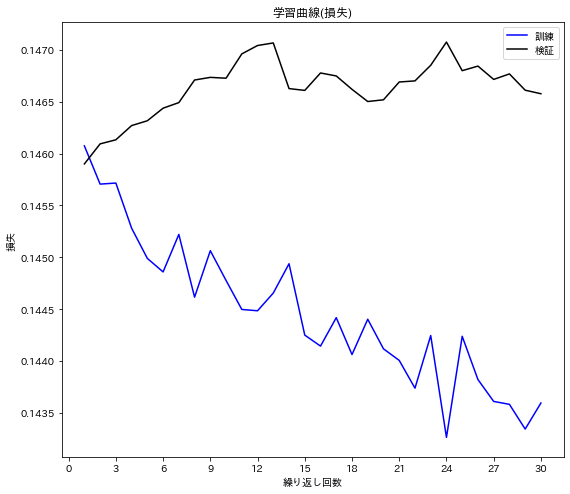

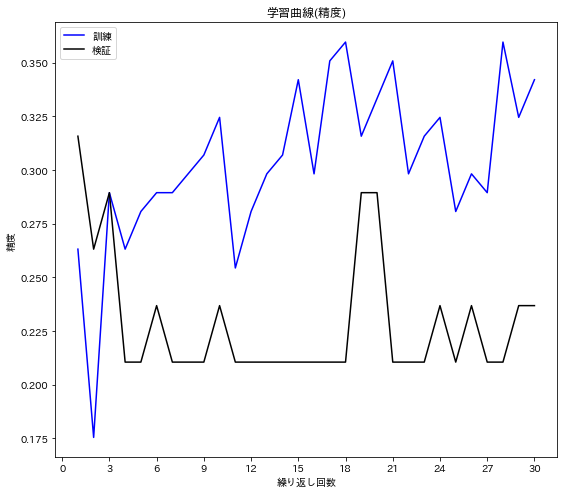

In [33]:
evaluate_history(history)